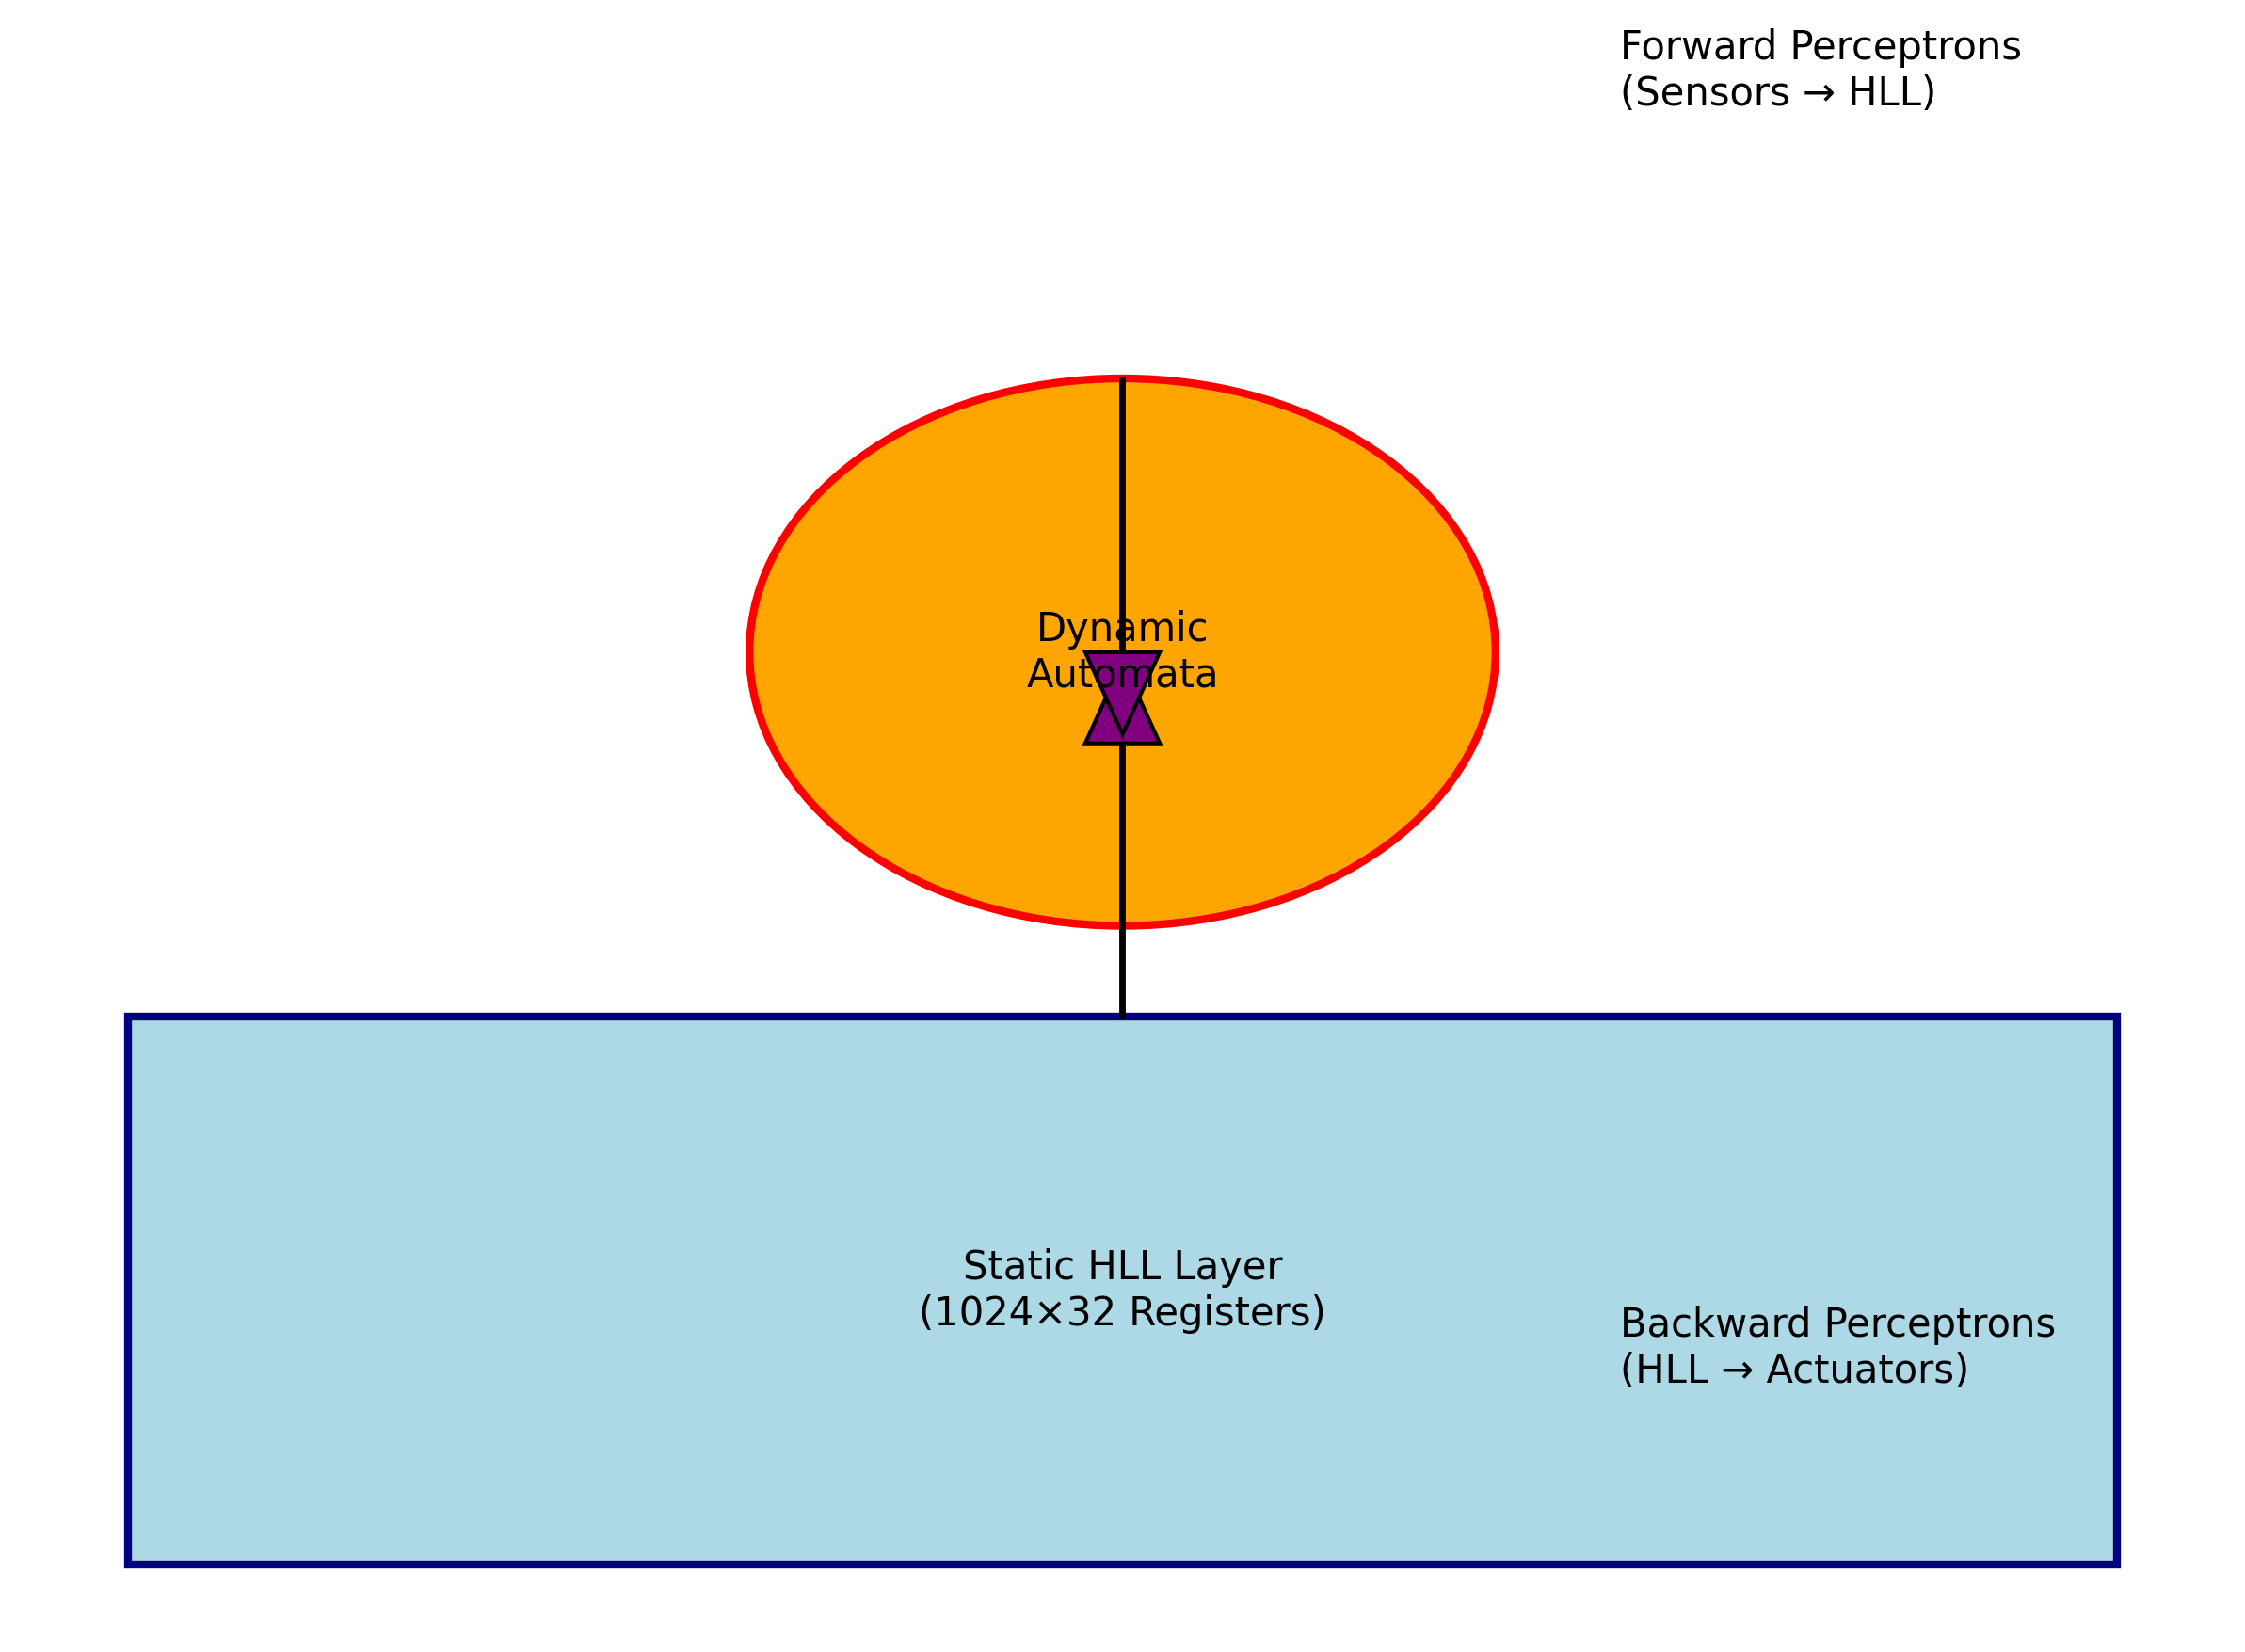

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Static HLL Layer
ax.add_patch(Rectangle((0.1, 0.1), 0.8, 0.3, fc='lightblue', ec='navy', lw=2))
ax.text(0.5, 0.25, 'Static HLL Layer\n(1024×32 Registers)', ha='center', va='center')

# Dynamic Automata
ax.add_patch(Circle((0.5, 0.6), 0.15, fc='orange', ec='red', lw=2))
ax.text(0.5, 0.6, 'Dynamic\nAutomata', ha='center', va='center')

# Perceptrons
ax.arrow(0.5, 0.4, 0, 0.15, head_width=0.03, fc='purple')
ax.arrow(0.5, 0.75, 0, -0.15, head_width=0.03, fc='purple')
ax.text(0.7, 0.9, 'Forward Perceptrons\n(Sensors → HLL)', ha='left')
ax.text(0.7, 0.2, 'Backward Perceptrons\n(HLL → Actuators)', ha='left')

plt.axis('off')
plt.savefig('core_architecture.png', format='png', bbox_inches='tight')

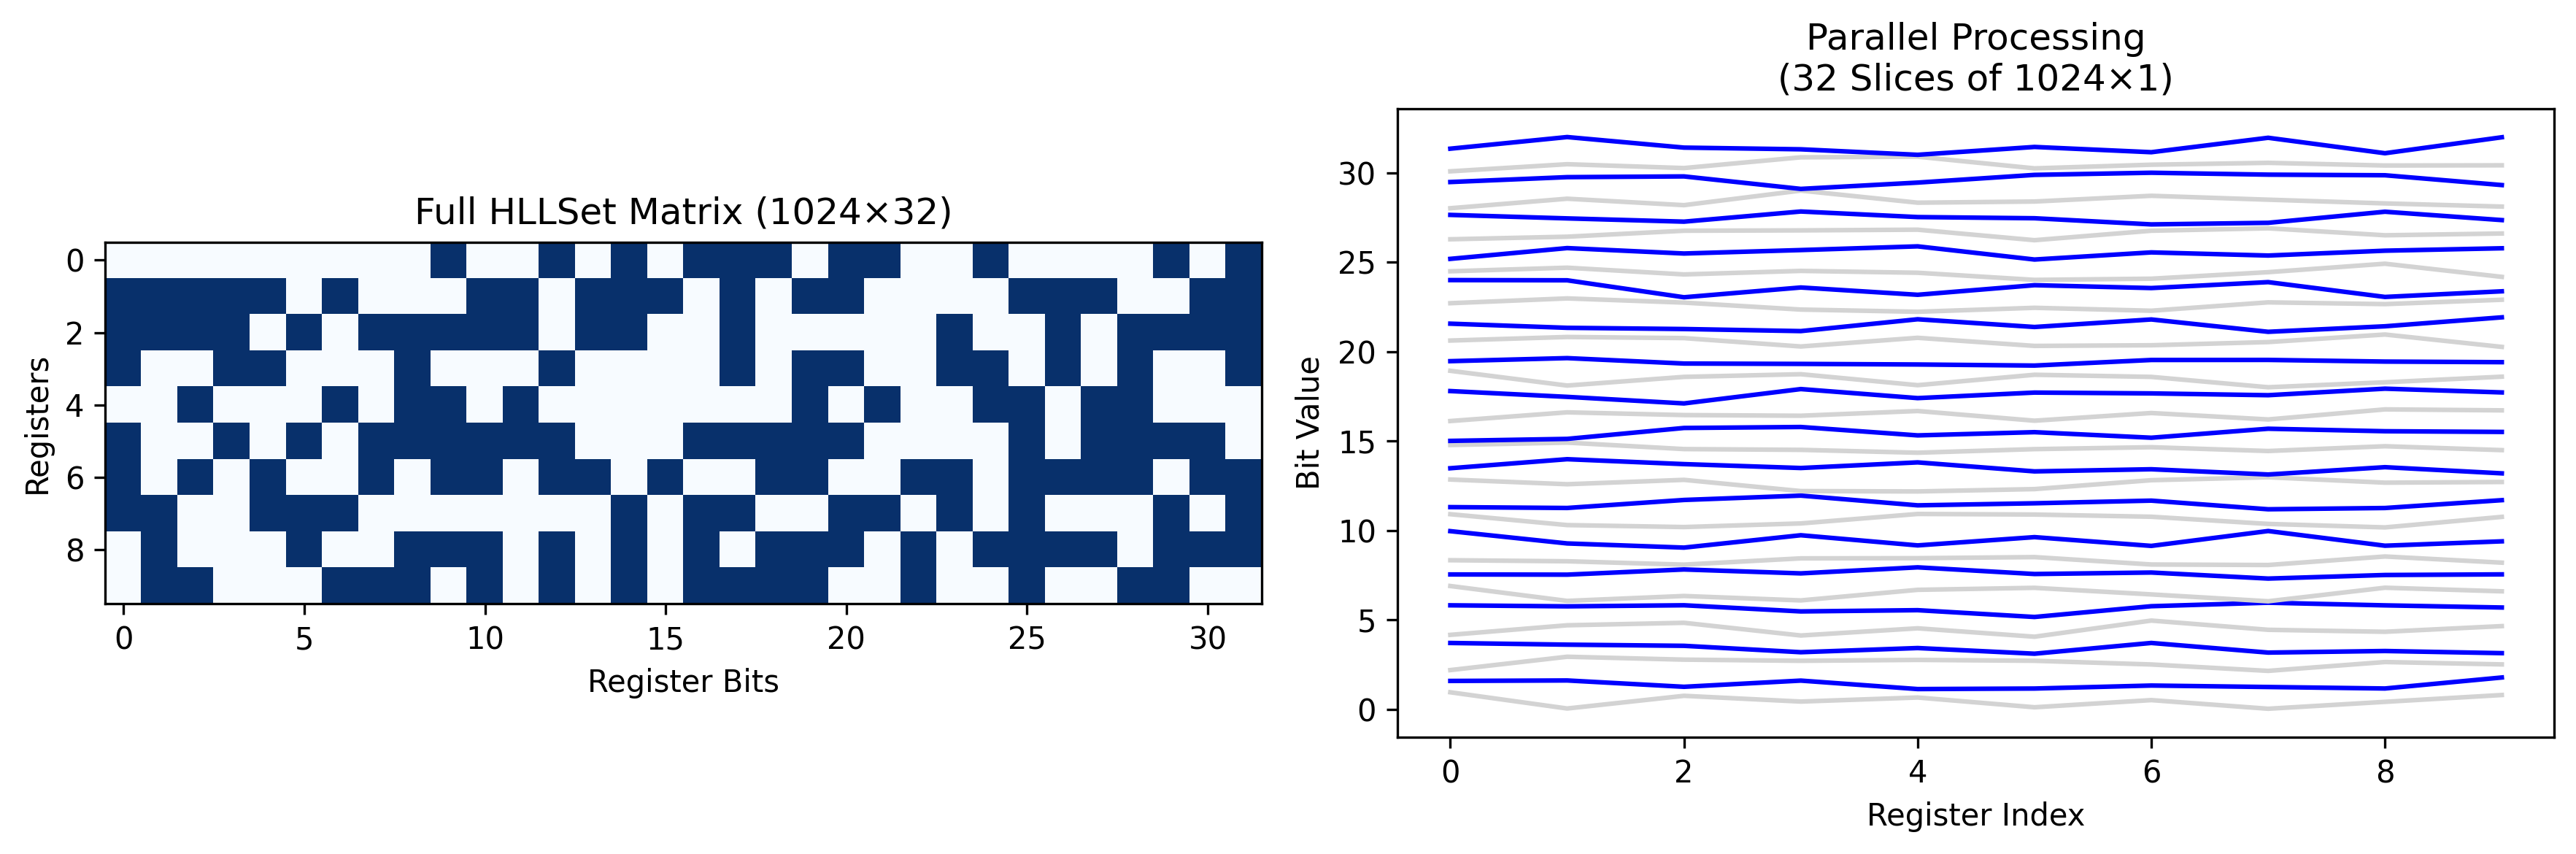

In [3]:
import numpy as np

plt.figure(figsize=(12, 4), dpi=300)
plt.subplot(1, 2, 1)
plt.imshow(np.random.randint(0, 2, (10, 32)), cmap='Blues')  # Reduced size for clarity
plt.title('Full HLLSet Matrix (1024×32)')
plt.xlabel('Register Bits')
plt.ylabel('Registers')

plt.subplot(1, 2, 2)
for i in range(32):
    plt.plot(np.random.rand(10) + i, color='blue' if i%2 else 'lightgray')  # 10-sample slice
plt.title('Parallel Processing\n(32 Slices of 1024×1)')
plt.xlabel('Register Index')
plt.ylabel('Bit Value')

plt.tight_layout()
plt.savefig('register_slicing.png', format='png')

In [5]:
import graphviz

dot = graphviz.Digraph(format='png')
dot.attr(rankdir='LR')

dot.node('A', 'Active (ψ)\n⚡', shape='circle', style='filled', fillcolor='lightblue')
dot.node('D', 'Discharged (|0⟩)\n⏳', shape='circle', style='dashed')
dot.node('S', 'Sleeping\n💤', shape='circle', style='dotted')

dot.edge('A', 'D', label='After operation')
dot.edge('D', 'S', label='Immediate')
dot.edge('S', 'A', label='Timer expires')

dot.render('state_machine', cleanup=True)  # Saves as state_machine.svg

'state_machine.png'

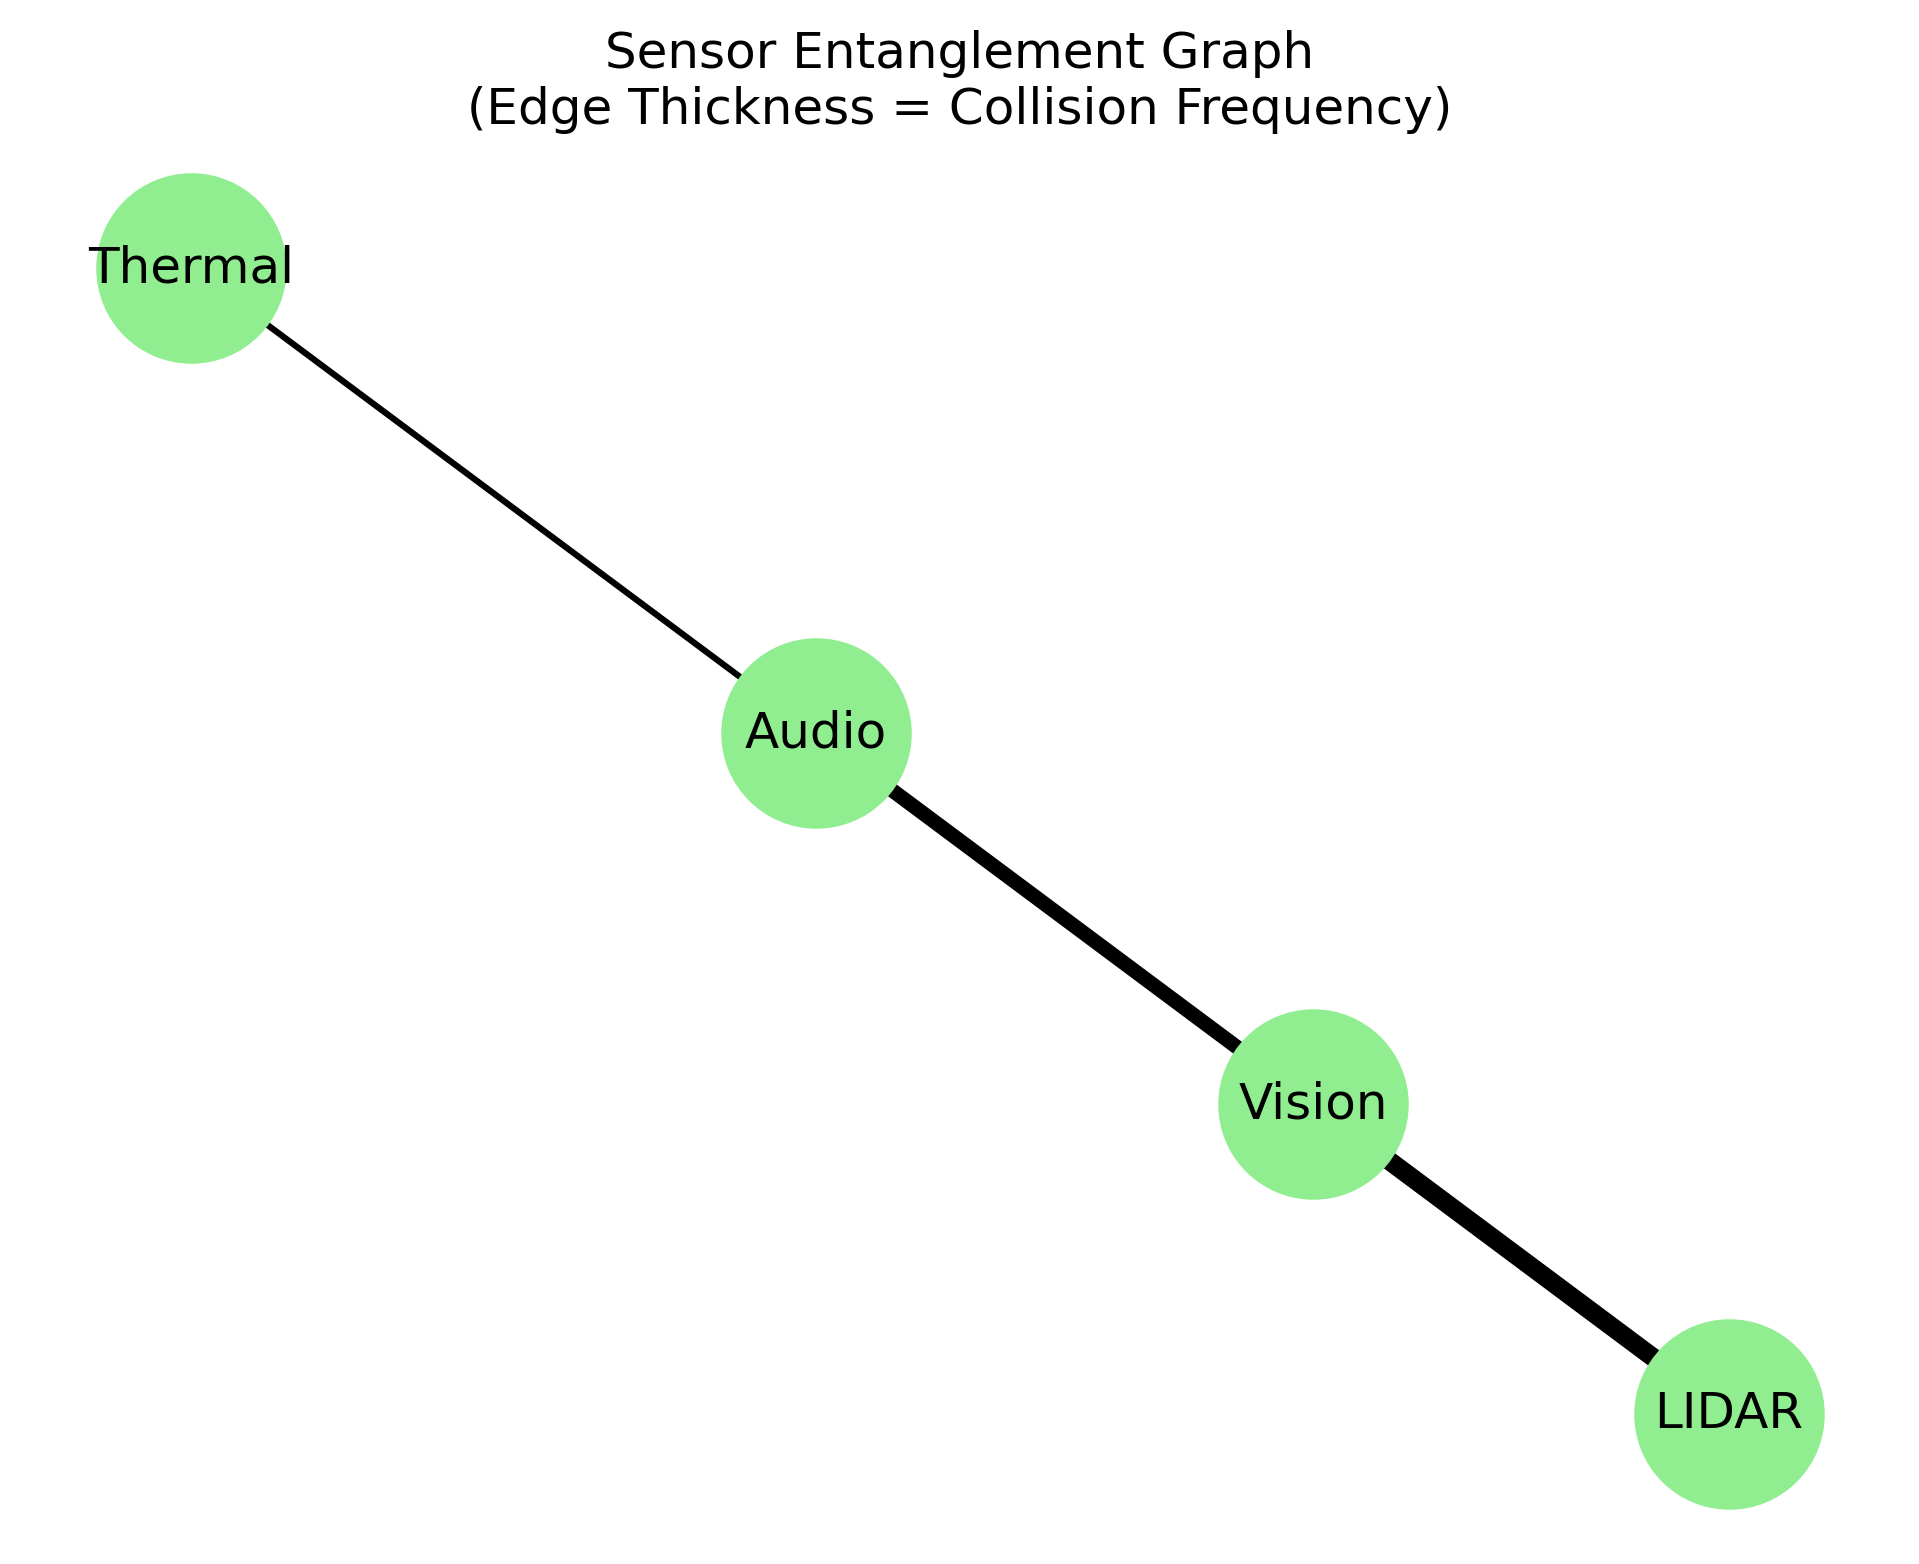

In [6]:
import networkx as nx

G = nx.Graph()
sensors = ["Vision", "Audio", "LIDAR", "Thermal"]
G.add_weighted_edges_from([
    ("Vision", "Audio", 0.7),
    ("Vision", "LIDAR", 0.9),
    ("Audio", "Thermal", 0.3)
])

plt.figure(figsize=(8, 6), dpi=300)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightgreen')
nx.draw_networkx_labels(G, pos, font_size=12)
nx.draw_networkx_edges(G, pos, width=[d['weight']*5 for u,v,d in G.edges(data=True)])

plt.title('Sensor Entanglement Graph\n(Edge Thickness = Collision Frequency)')
plt.axis('off')
plt.savefig('entanglement_graph.png', format='png', bbox_inches='tight')

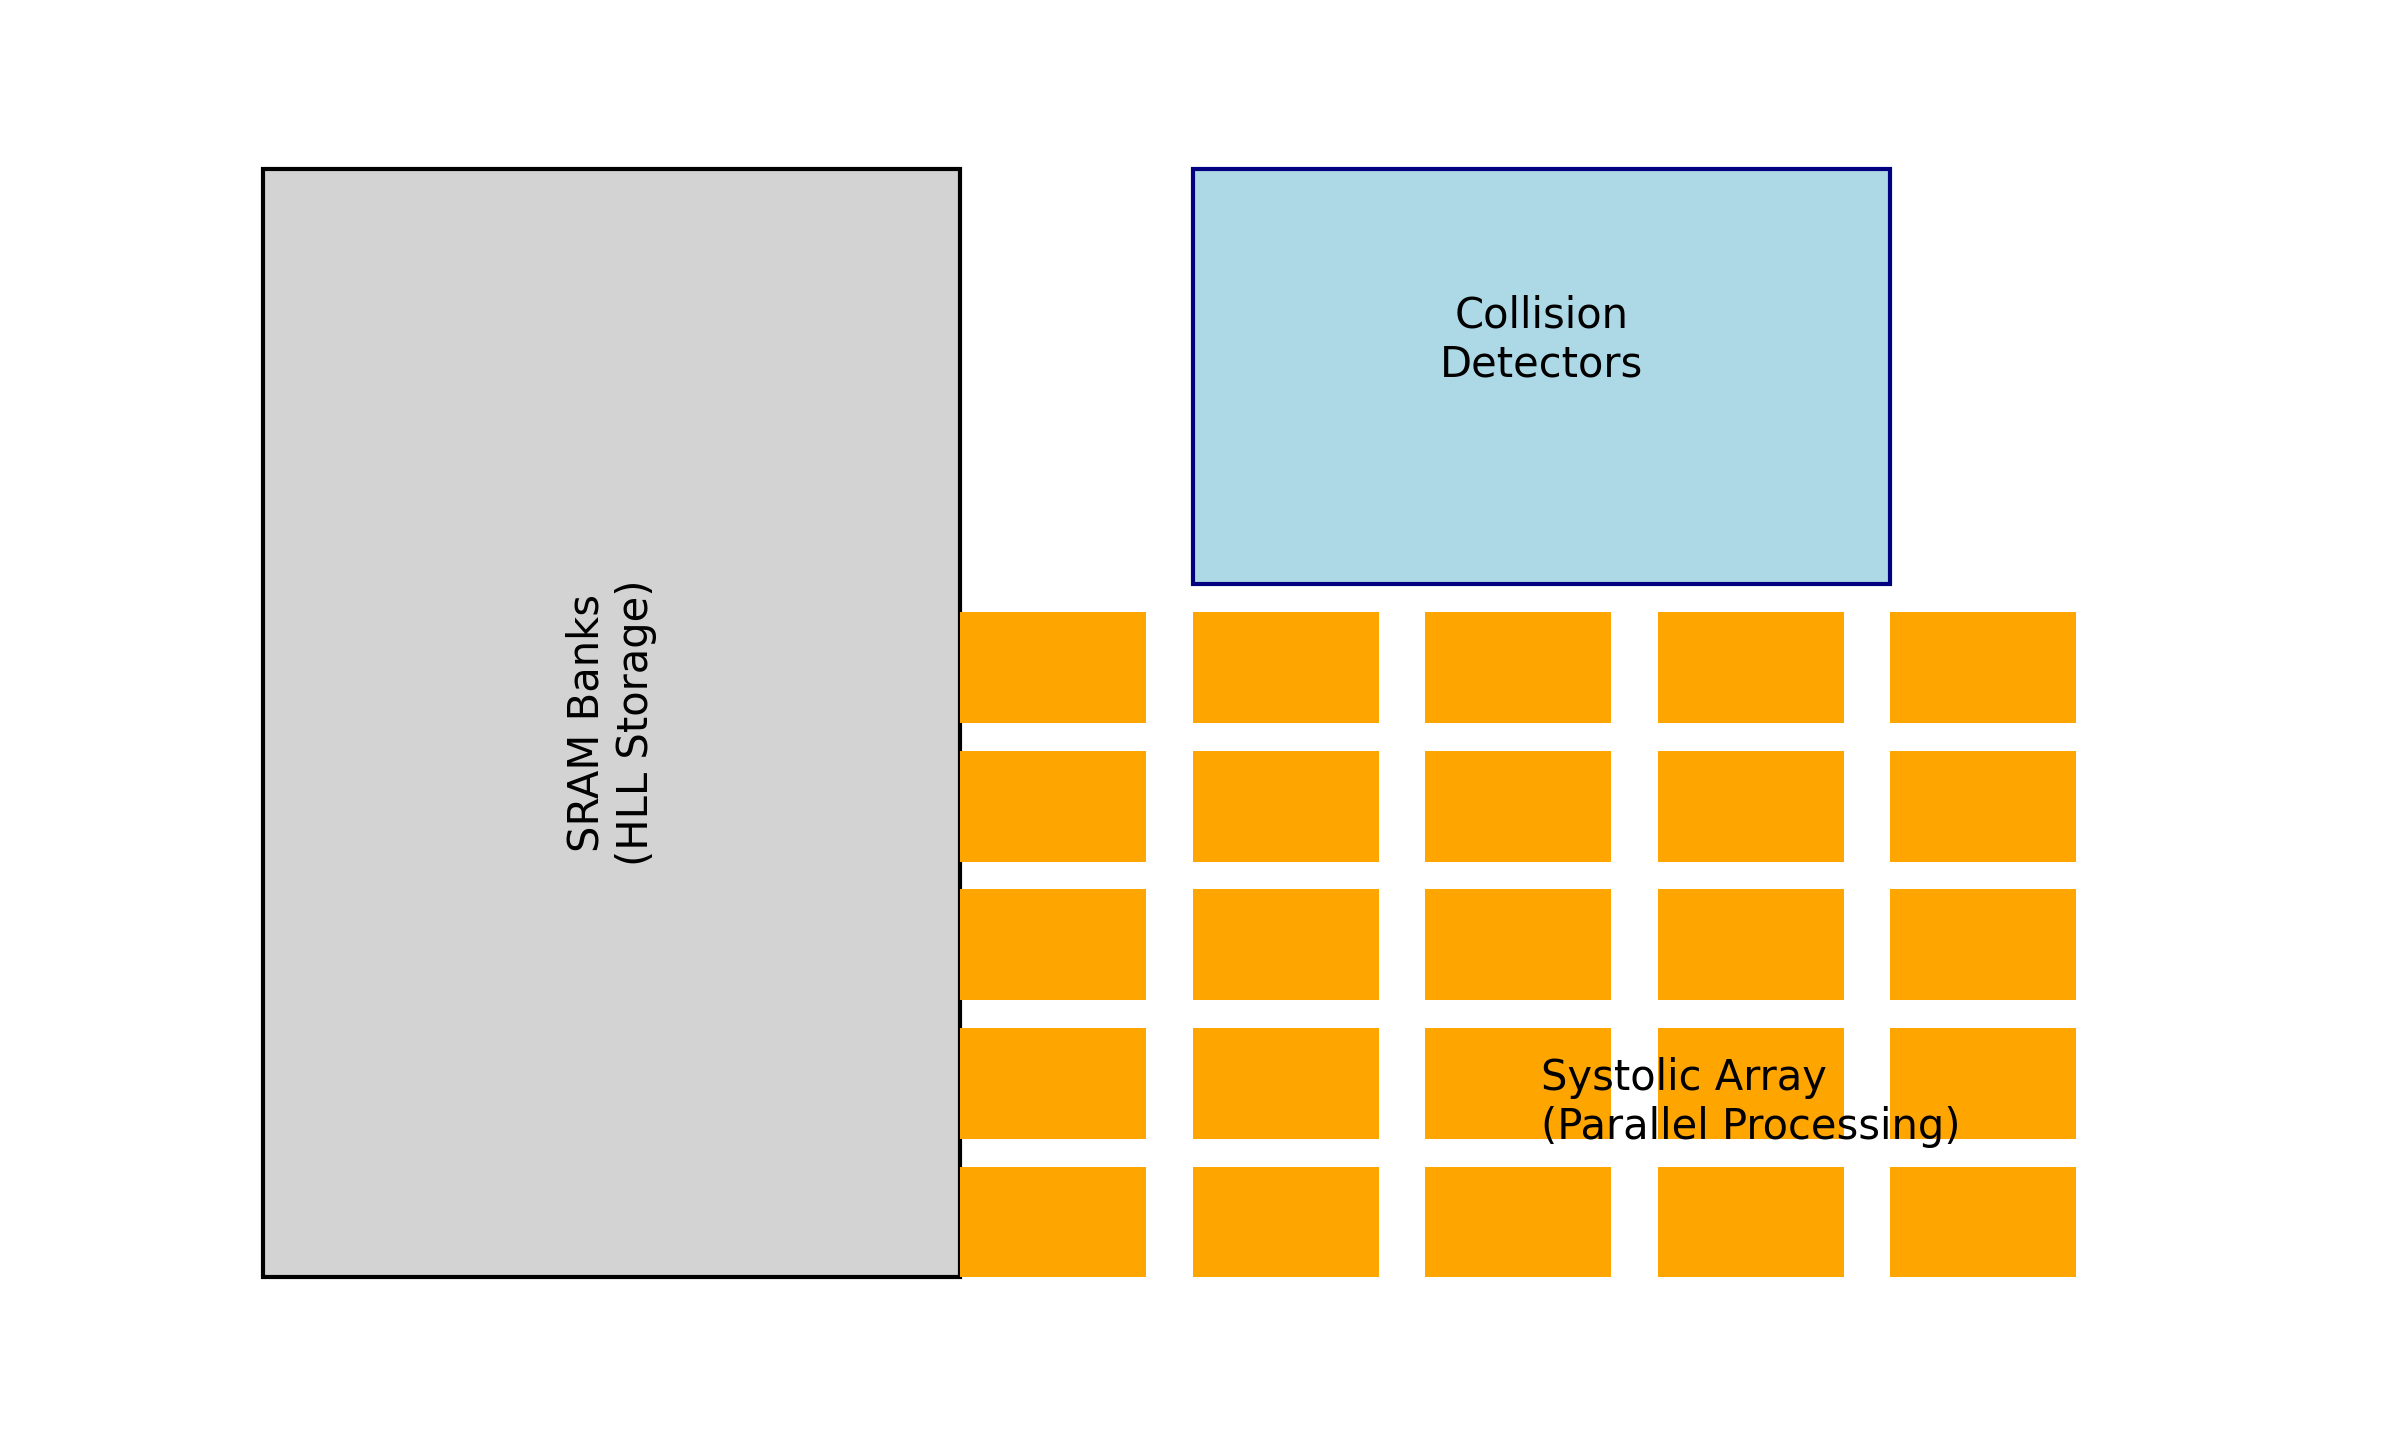

In [7]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# SRAM Banks
ax.add_patch(Rectangle((0.1, 0.1), 0.3, 0.8, fc='lightgray', ec='black'))
ax.text(0.25, 0.5, 'SRAM Banks\n(HLL Storage)', rotation=90, ha='center', va='center')

# Collision Detectors
ax.add_patch(Rectangle((0.5, 0.6), 0.3, 0.3, fc='lightblue', ec='navy'))
ax.text(0.65, 0.75, 'Collision\nDetectors', ha='center')

# Systolic Array
for i in range(5):
    for j in range(5):
        ax.add_patch(Rectangle((0.4+i*0.1, 0.1+j*0.1), 0.08, 0.08, fc='orange'))

plt.text(0.65, 0.2, 'Systolic Array\n(Parallel Processing)')
plt.axis('off')
plt.savefig('hardware_floorplan.png', format='png', bbox_inches='tight')

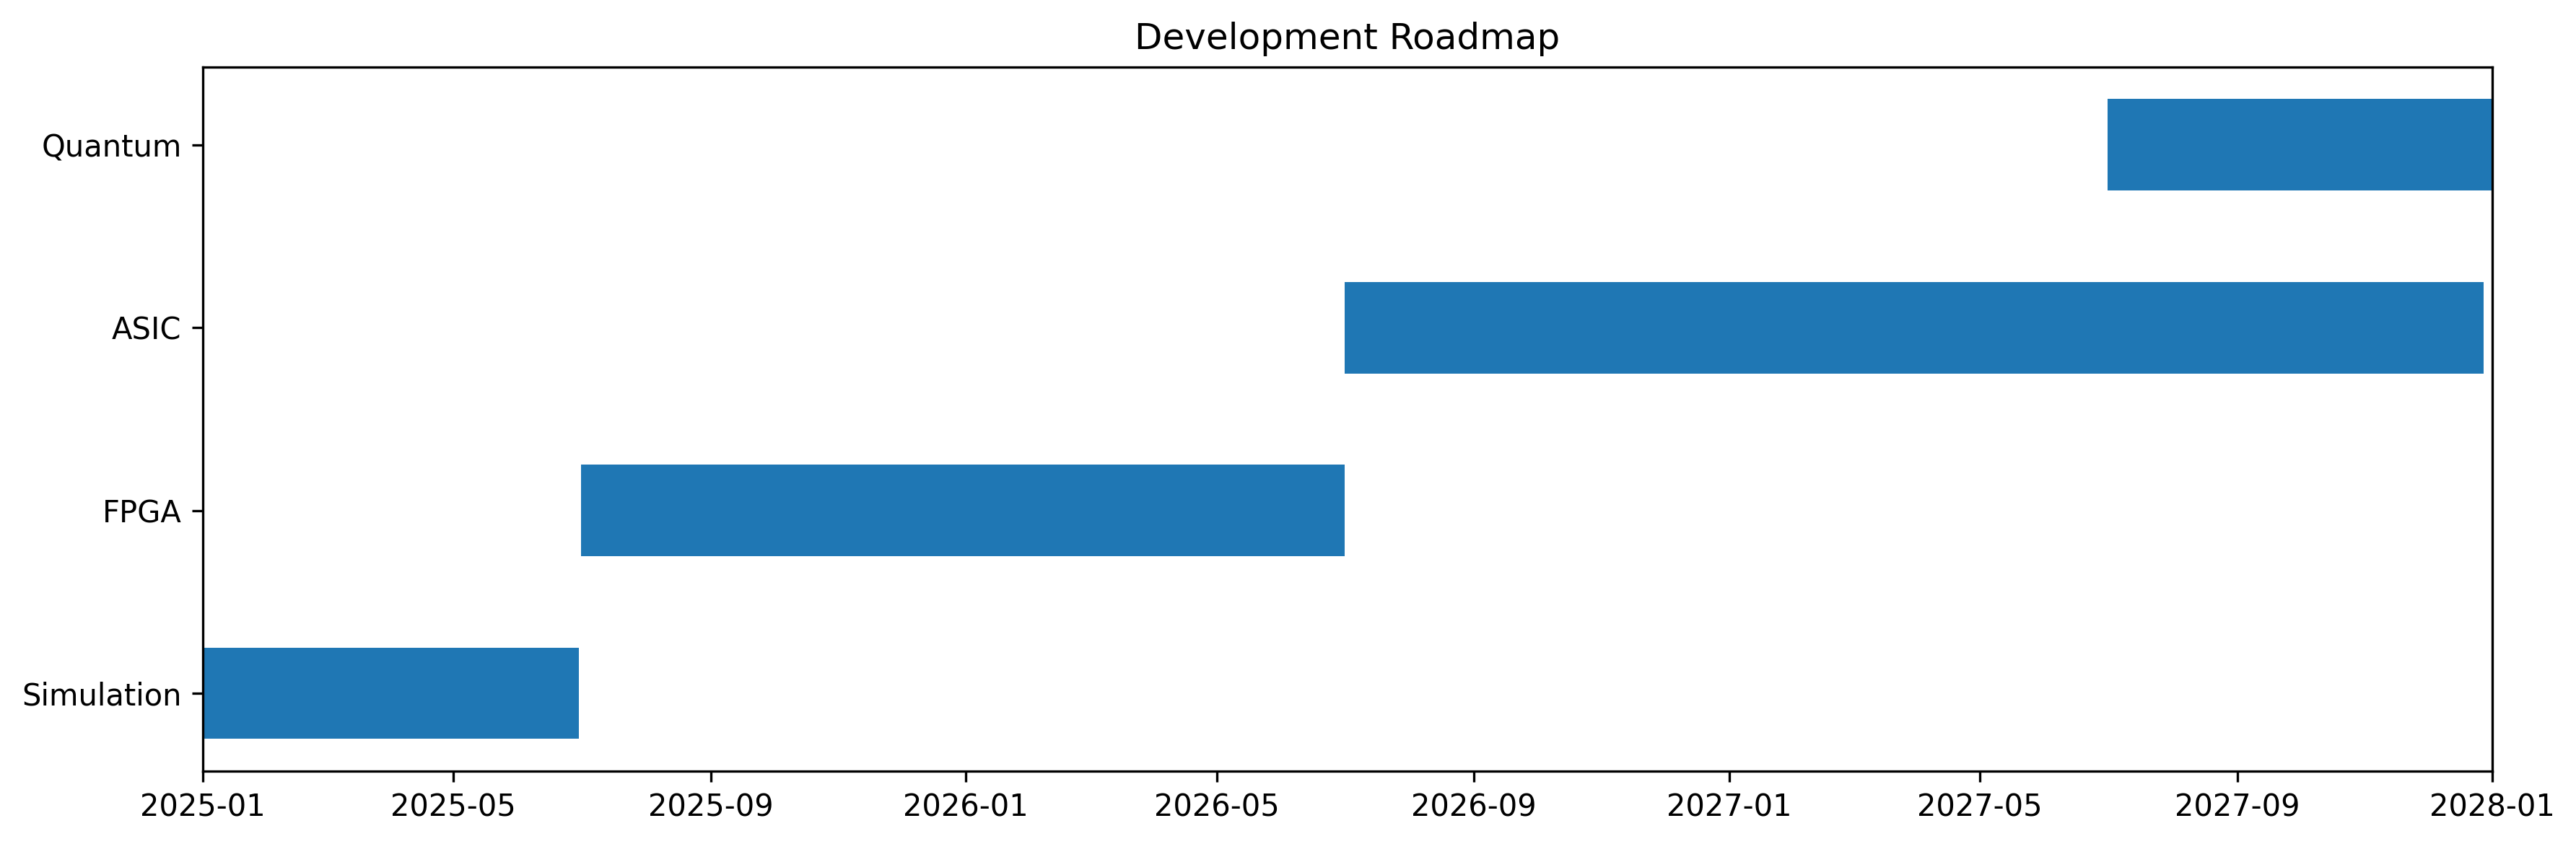

In [9]:
import pandas as pd

df = pd.DataFrame({
    'Phase': ['Simulation', 'FPGA', 'ASIC', 'Quantum'],
    'Start': pd.to_datetime(['2025-01-01', '2025-07-01', '2026-07-01', '2027-07-01']),
    'Duration': [180, 365, 545, 365]
})

fig, ax = plt.subplots(figsize=(12, 4), dpi=300)
ax.barh(df['Phase'], df['Duration'], left=df['Start'], height=0.5)

ax.set_xlim(pd.to_datetime('2025-01-01'), pd.to_datetime('2028-01-01'))
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.title('Development Roadmap')
plt.tight_layout()
plt.savefig('roadmap.svg', format='svg', bbox_inches='tight')

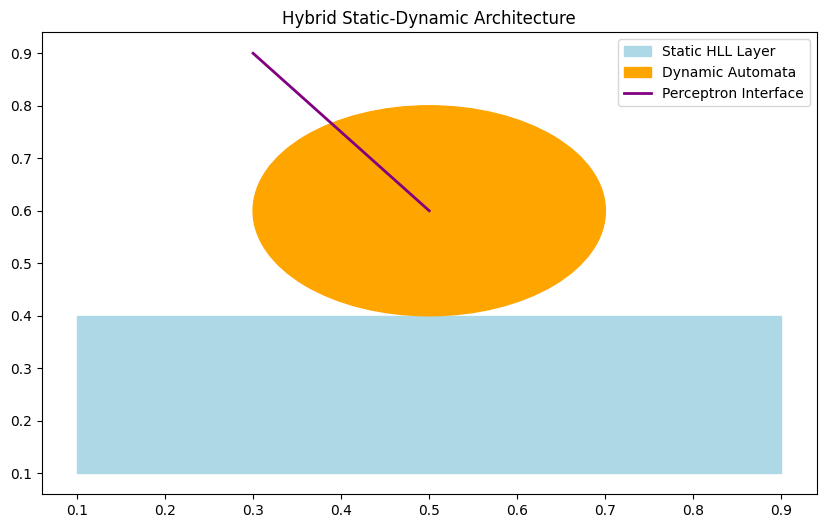

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 6))
ax.add_patch(patches.Rectangle((0.1, 0.1), 0.8, 0.3, color='lightblue', label='Static HLL Layer'))
ax.add_patch(patches.Circle((0.5, 0.6), 0.2, color='orange', label='Dynamic Automata'))
plt.plot([0.5, 0.3], [0.6, 0.9], 'purple', lw=2, label='Perceptron Interface')
plt.legend()
plt.title("Hybrid Static-Dynamic Architecture")
plt.show()

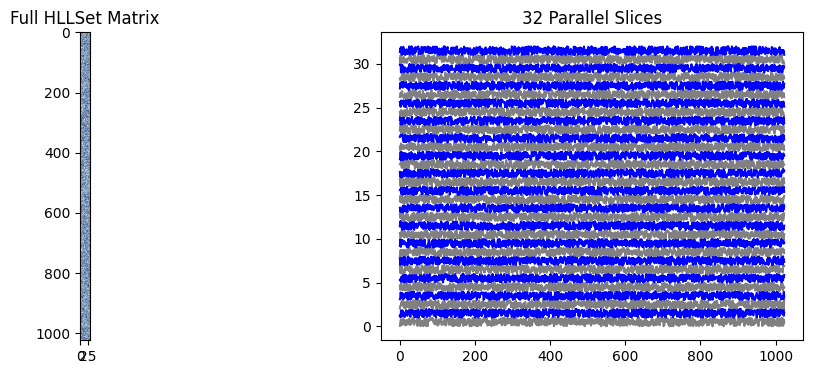

In [11]:
import numpy as np
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(np.random.randint(0, 2, (1024, 32)), cmap='Blues')
plt.title("Full HLLSet Matrix")
plt.subplot(122)
for i in range(32):
    plt.plot(np.random.rand(1024) + i, color='blue' if i%2 else 'gray')
plt.title("32 Parallel Slices")
plt.show()